In [6]:
#https://analyticsindiamag.com/step-by-step-guide-to-reviews-classification-using-svc-naive-bayes-random-forest/
#!pip install fastai==2.0.10 torch==1.6 fastcore==1.0.0

In [11]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [25]:
df =pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


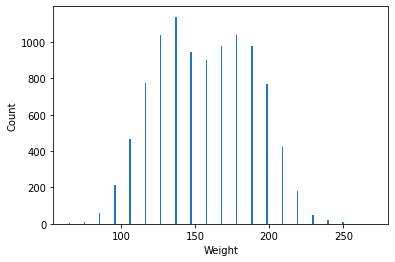

In [27]:
plt.hist(df.Weight,bins=20,width=1)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [28]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [29]:
upper = df.Weight.mean() + 3*df.Weight.std()
lower = df.Weight.mean() -3*df.Weight.std()
print(upper)
print(lower)

257.7656738523894
65.11503981327212


In [30]:
new_df= df[(df.Weight<upper) & (df.Weight>lower)]
new_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
df['zscore'] = (df.Weight - df.Weight.mean())/(df.Weight.std())
df.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680


In [34]:
df[df['zscore']>3]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.380711


In [35]:
df[df['zscore']<-3]

,Gender,Height,Weight,zscore
9285,Female,54.263133,64.700127,-3.012922


In [36]:
df_new = df[(df.zscore>-3) & (df.zscore<3)]

In [37]:
df_new

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,2.505672
1,Male,68.781904,162.310473,0.027099
2,Male,74.110105,212.740856,1.597726
3,Male,71.730978,220.042470,1.825131
4,Male,69.881796,206.349801,1.398680
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.768113
9996,Female,67.067155,170.867906,0.293616
9997,Female,63.867992,128.475319,-1.026678
9998,Female,69.034243,163.852461,0.075124
